# Labb 2

Point (25, 32) is classified as Pikachu
Point (24.2, 31.5) is classified as Pikachu
Point (22, 34) is classified as Pikachu
Point (20.5, 34) is classified as Pichu


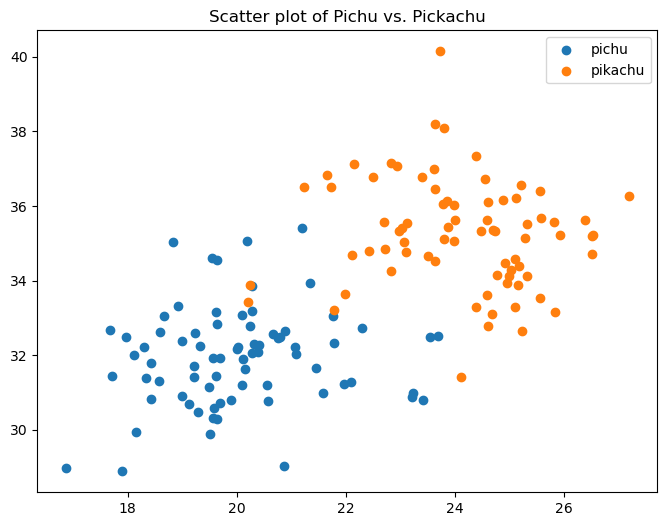

In [30]:
import matplotlib.pyplot as plt

Data = [] #(width (cm), height (cm), label (0-pichu, 1-pikachu))  
points_to_classify = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]
plt.figure(figsize=(8,6))


with open("Data_For_Labb2.csv","r") as file:                        # taking all data from file into a dict
    for lines in file:
        values = [float(x) for x in lines.strip().split(',')]
        Data.append(values)

width_dict = {"width":[]}
height_dict = {"height":[]}
label_dict = {"label":[]}

for row in Data:                                                   # making 3 different different dicts
    width, height, label = row
    width_dict["width"].append(width)
    height_dict["height"].append(height)
    label_dict["label"].append(label)

width_values = width_dict["width"]
height_values = height_dict["height"]
label_values = label_dict["label"]

def classify_point(point, data):                                    #pinpointing data
      min_distance = float('inf')
      closest_label = None
    
      for row in data:
          width, height, label = row
          distance = ((point[0] - width) ** 2 + (point[1] - height) ** 2) ** 0.5

          if distance < min_distance:
            min_distance = distance
            closest_label = label

      return closest_label

for point in points_to_classify:
     predicted_label = classify_point(point, Data)
    
     if predicted_label == 1:
         print(f"Point {point} is classified as Pikachu")
     else:
         print(f"Point {point} is classified as Pichu")

for label in set(label_values):
    x = [width_values[i] for i in range(len(label_values)) if label_values[i] == label]
    y = [height_values[i] for i in range(len(label_values)) if label_values[i] == label]
    
    if label == 1:
        label_name = "pikachu"
    else:
        label_name = "pichu"

    plt.scatter(x, y, label= label_name)

plt.title('Scatter plot of Pichu vs. Pickachu')
plt.legend()
plt.show()







# Uppgift 1

In [37]:
Data = []   

with open("Data_For_Labb2.csv","r") as file:                        # taking all data from file into a dict
    for lines in file:
        values = [float(x) for x in lines.strip().split(',')]
        Data.append(values)

width_dict = {"width":[]}
height_dict = {"height":[]}
label_dict = {"label":[]}

for row in Data:                                                   # making 3 different different dicts
    width, height, label = row
    width_dict["width"].append(width)
    height_dict["height"].append(height)
    label_dict["label"].append(label)

width_values = width_dict["width"]
height_values = height_dict["height"]
label_values = label_dict["label"]

def classify_point(point, data):                                    #pinpointing data
      min_distance = float('inf')
      closest_label = None
    
      for row in data:
          width, height, label = row
          distance = ((point[0] - width) ** 2 + (point[1] - height) ** 2) ** 0.5

          if distance < min_distance:
            min_distance = distance
            closest_label = label

      return closest_label

while True:                                               #userinput
    try:
        
        x_inputed_axis = float(input("Enter the x-coordinate: "))
        y_inputed_axis = float(input("Enter the y-coordinate: "))
        
        if x_inputed_axis < 0 or y_inputed_axis < 0:
            print("Write a positive number")
            continue

        input_point = (x_inputed_axis, y_inputed_axis)
        predicted_label = classify_point(input_point, Data)

        if predicted_label == 1:
            print(f"The point {input_point} is classified as Pikachu")
        else:
            print(f"The point {input_point} is classified as Pichu")

    except ValueError:
        print("Invalid input. Please enter valid numeric coordinates.")

    
    another_point = input("Do you want to try another point? (yes/no): ").lower()
    if another_point != 'yes':
        break


    







Write a positive number
The point (2.0, 3.0) is classified as Pichu


# Uppgift 2

In [5]:
import csv
import numpy as np

# Load data from CSV into a NumPy array
def load_data(filename):
    data = []
    with open(filename, "r") as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(list(map(float, row)))
    return np.array(data)

# Organizing the data into separate arrays
data = load_data("Data_For_Labb2.csv")
width_values, height_values, label_values = data[:, 0], data[:, 1], data[:, 2]

# Pinpointing data based on nearest k points
def classify_point(point, data, k=10):
    distances = np.sqrt(np.sum((data[:, :2] - point) ** 2, axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = data[nearest_indices, 2]
    label_counts = np.bincount(nearest_labels.astype(int))
    
    if len(label_counts) == 2:
        if label_counts[0] == label_counts[1]:
            return "Evenly split"
        else:
            return np.argmax(label_counts)
    else:
        return label_counts[0]

while True:
    try:
        x_inputed_axis = float(input("Enter the x-coordinate: "))
        y_inputed_axis = float(input("Enter the y-coordinate: "))
        
        if x_inputed_axis < 0 or y_inputed_axis < 0:
            print("Write a positive number")
            continue

        input_point = np.array([x_inputed_axis, y_inputed_axis])
        predicted_label = classify_point(input_point, data, k=10)

        if predicted_label == "Evenly split":
            print("The nearest neighbors are evenly split between Pikachu and Pichu.")
        elif predicted_label == 1:
            print(f"The point {input_point} is classified as Pikachu")
        else:
            print(f"The point {input_point} is classified as Pichu")

    except ValueError:
        print("Invalid input. Please enter valid coordinates.")

    another_point = input("Do you want to try another point? (yes/no): ").lower()
    if another_point != 'yes':
        break

The point (30.0, 30.0) is classified as Pikachu
The point (27.0, 27.0) is classified as Pichu
The point (28.0, 28.0) is classified as Pikachu
The point (27.5, 27.5) is classified as Pikachu
The point (27.4, 27.4) is classified as Pikachu
The point (27.3, 27.3) is classified as Pikachu
The nearest neighbors are evenly split between Pikachu and Pichu.
